# Assignment 2 - ELEC4700 - Quazi Ahmed

In [7]:
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy import sparse,linalg

from matplotlib import animation, rc
from IPython.display import HTML
import scipy

## Preparation of utility function

In [224]:
def indexer(G,n,val=None):
    ny,nx = G.shape
    y = (ny-n-1) % ny
    x = np.clip(np.floor(n/ny).astype('int'),0,ny*nx)
    if val:
        G[y,x] = val
    return G[y,x]

def map_back(x,y,nx,ny):
    
    _n = ny-y + (x)*ny -1
    return _n

 Testing indexing and mapping functions

In [251]:
tx,ty = 10,7
arr = []
for i in range(tx):
    tarr = []
    for j in range(ty):
        tarr.append(map_back(i,j,tx,ty))
    tarr = np.array(tarr)[None].T
    arr.append(tarr)
test = np.concatenate(arr,axis=1)

In [227]:
# Assert that the mapping functions match
n = 0
for i in range(tx):
    for j in range(ty-1,-1,-1):
        assert(indexer(test,n) == map_back(i,j,tx,ty) )
        n+=1

In [ ]:
for i in range(nx*ny):
    for j in range(ny):

In [270]:
nmax = []
for i in range(nx):
    for j in range(ny):
        n = map_back(i,j,nx,ny)
        nmax.append(n)
np.max(nmax)

1199

## Part 1 

### Problem a)

In [343]:
nx = 50
ny = 50

In [344]:
P = np.random.rand(nx,ny)

In [345]:
# create V vector from P matrix using mapping from slides
V = []
for i in range(nx*ny):
    V.append(indexer(P,i))
V = np.array(V)

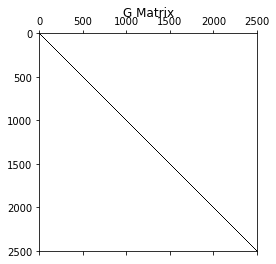

In [361]:
# create G matrix
G = np.zeros((nx*ny,nx*ny))
B = np.zeros((nx*ny,1))
n = 0
for i in range(nx):
    for j in range(ny):
        n = map_back(i,j,nx,ny)
        # in numpy the matrix is addressed as G[y,x]
        if i == 0:
            G[n,:] = 0
            G[n,n] = 1
            B[n] = 1
        elif i == nx:
            G[n,:] = 0
            G[n,n] = 1
          
        elif j==1:
            nxm = n-ny
            nxp = n+ny
            nyp = n+1
            
            G[n,n] = -3
            
            if(nxm > 0 and nxm < nx*ny):
                G[n,nxm] = 1
            if(nxp > 0 and nxp < nx*ny):
                G[n,nxp] = 1
            if(nyp > 0 and nyp < nx*ny):
                G[n,nyp] = 1
        
        elif j==ny:
            nxm = n-ny
            nxp = n+ny
            nym = n-1
            
            G[n,n] = -3
            if(nxm > 0 and nxm < nx*ny):
                G[n,nxm] = 1
            if(nxp > 0 and nxp < nx*ny):
                G[n,nxp] = 1
            if(nym > 0 and nym < nx*ny):
                G[n,nym] = 1
        
        else:
            nxm = n-ny
            nxp = n+ny
            nym = n-1
            nyp = n+1
            G[n,n] = -4
            if(nxm > 0 and nxm < nx*ny):
                G[n,nxm] = 1
            if(nxp > 0 and nxp < nx*ny):
                G[n,nxp] = 1
            if(nym > 0 and nym < nx*ny):
                G[n,nym] = 1
            if(nyp > 0 and nyp < nx*ny):
                G[n,nyp] = 1
            
plt.spy(G);
plt.title("G Matrix");

In [362]:
V = linalg.solve(G,B) # equivalent to G/B'

In [363]:
#map V back into P matrix
for i in range(nx*ny):
    indexer(P,i,V[i])

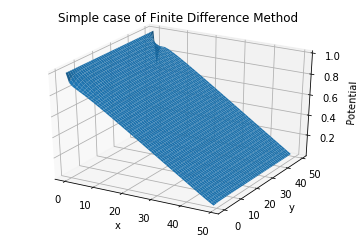

In [364]:
plt.ion()
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
fig2 = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,P);
ax.set_title("Simple case of Finite Difference Method")
ax.set_zlabel("Potential")
ax.set_xlabel("x")
ax.set_ylabel("y");

### problem b)

In [14]:
nx = 100
ny = 100

#### Analytical Model

In [15]:
V2 = np.zeros((nx,ny))
a=30
b=10
for n in range(1,100,2):
    for i in range(nx):
        for j in range(ny):

            numerator = np.cosh((n*np.pi*i)/a)
            denominator = np.cosh((n*np.pi*b)/a)
            mul = np.sin((n*np.pi*j)/a)
            
            comp = (1/n)*(numerator/denominator)*mul
            res = (4/np.pi)*comp
            V2[i,j] += res
        

C:\SPB_Data\.conda\envs\4700\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in cosh
C:\SPB_Data\.conda\envs\4700\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars
C:\SPB_Data\.conda\envs\4700\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


C:\SPB_Data\.conda\envs\4700\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1674: RuntimeWarning: invalid value encountered in double_scalars
  avgzsum = sum(p[2] for p in ps2)
C:\SPB_Data\.conda\envs\4700\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1686: RuntimeWarning: invalid value encountered in subtract
  v2[which_pt] = np.array(ps2[i2]) - np.array(ps2[i3])
C:\SPB_Data\.conda\envs\4700\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1685: RuntimeWarning: invalid value encountered in subtract
  v1[which_pt] = np.array(ps2[i1]) - np.array(ps2[i2])
C:\SPB_Data\.conda\envs\4700\lib\site-packages\numpy\core\numeric.py:1735: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
C:\SPB_Data\.conda\envs\4700\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:96: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(v[0]**2+v[1]**2+v[2]**2)
C:\SPB_Data\.conda\envs\4700\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:96: RuntimeWarning: invalid value en

C:\SPB_Data\.conda\envs\4700\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:160: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


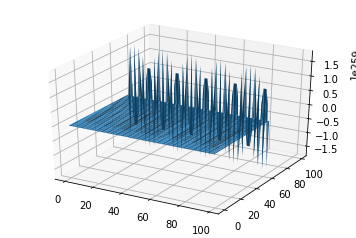

In [16]:
plt.ion()
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
fig2 = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,V2)

The implementation of the analytical solution does not work and is freq

#### Finite Difference Method

In [372]:
P = np.random.rand(nx,ny)

In [373]:
# create V vector from P matrix using mapping from slides
V = []
for i in range(nx*ny):
    V.append(indexer(P,i))
V = np.array(V)

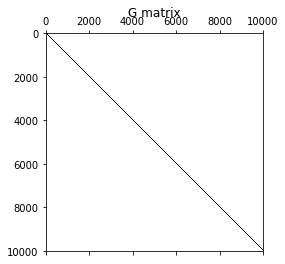

In [374]:
# create G matrix
G = np.zeros((nx*ny,nx*ny))
B = np.zeros((nx*ny,1))
n = 0
for i in range(nx):
    for j in range(ny):
        n = idx2(i,j,nx,ny)
        # in numpy the matrix is addressed as G[y,x]
        if i == 0:
            G[n,:] = 0
            G[n,n] = 1
            B[n] = 1
        elif i == nx-1:
            G[n,:] = 0
            G[n,n] = 1
            B[n] = 1
          
        elif j==1:
            G[n,:] = 0
            G[n,n] = 1
            B[n] = 0
            
        
        elif j==ny-1:
            G[n,:] = 0
            G[n,n] = 1
            B[n] = 0
        
        else:
            nxm = n-ny
            nxp = n+ny
            nym = n-1
            nyp = n+1
            G[n,n] = -4
            if(nxm > 0 and nxm < nx*ny):
                G[n,nxm] = 1
            if(nxp > 0 and nxp < nx*ny):
                G[n,nxp] = 1
            if(nym > 0 and nym < nx*ny):
                G[n,nym] = 1
            if(nyp > 0 and nyp < nx*ny):
                G[n,nyp] = 1
            
        

plt.spy(G)
plt.title("G matrix");

In [375]:
V = linalg.solve(G,B)

In [376]:
#map V back into P matrix
for i in range(nx*ny):
    indexer(P,i,V[i])

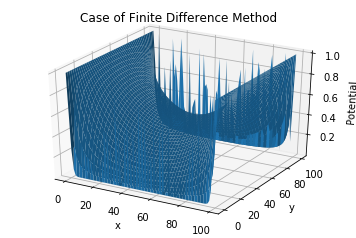

In [377]:
plt.ion()
x = np.arange(nx)
y = np.arange(ny)
X, Y = np.meshgrid(x, y)
fig2 = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,P)
ax.set_title("Case of Finite Difference Method")
ax.set_zlabel("Potential")
ax.set_xlabel("x")
ax.set_ylabel("y");

By adjusting the mesh sizing of the finite difference method we see the numerical method approach the analytical solution (from the instructions).

# Part 2

In [331]:
# make Cmap
nx = 30
ny = 30
Lb = 10
bStartX = 0
bStartY = 10
gap = 5
Wb = (nx - gap)/2

Vmat = np.random.rand(nx,ny)
Cmap = np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        cond_x1 = i >= bStartX and i <= (bStartX + Wb)
        cond_x2 = i >= (bStartX + Wb + gap) and i<= nx
        
        cond_y1 = j >= bStartY and j <= (bStartY + Lb)
        if((cond_x1 or cond_x2) and (cond_y1)):
            Cmap[i,j] = 10**-2
        else:
            Cmap[i,j] = 1
        

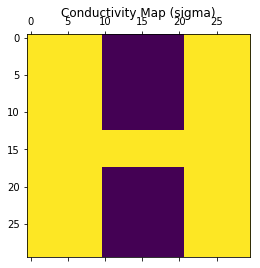

In [332]:
plt.matshow(Cmap);
plt.title("Conductivity Map (sigma)");

In [293]:
# create V vector from P matrix using mapping from slides
V = []
for i in range(nx*ny):
    V.append(indexer(Vmat,i))
V = np.array(V)

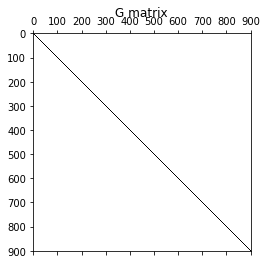

In [302]:
def create_Gmat2(nx,ny,Cmap):
    # create G matrix
    G = np.zeros((nx*ny,nx*ny))
    B = np.zeros((nx*ny,1))
    n = 0
    maxn = []
    for i in range(nx):
        for j in range(ny):
            n = map_back(i,j,nx,ny)
            if i == 0: # left wall
                G[n,:] = 0
                G[n,n] = 1
                B[n] = 1
            elif i == nx-1: # right wall
                G[n,:] = 0
                G[n,n] = 1

            elif j==0: # top
                nxm = n-ny
                nxp = n+ny
                nyp = n+1
                rxp = 0
                rxm = 0
                ryp = 0

                if(nxm > 0 and nxm < nx*ny):
                    rxm = (indexer(Cmap,n) + indexer(Cmap,nxm))/2
                    G[n,nxm] = rxm
                if(nxp > 0 and nxp < nx*ny):
                    rxp = (indexer(Cmap,n) + indexer(Cmap,nxp))/2
                    G[n,nxp] = rxp
                if(nyp > 0 and nyp < nx*ny):
                    ryp = (indexer(Cmap,n) + indexer(Cmap,nyp))/2
                    G[n,nyp] = ryp
                G[n,n] = -(rxm+rxp+ryp)


            elif j==ny: # bottom
                nxm = n-ny
                nxp = n+ny
                nym = n-1

                rxp = 0
                rxm = 0
                rym = 0

                if(nxm > 0 and nxm < nx*ny):
                    rxm = (indexer(Cmap,n) + indexer(Cmap,nxm))/2
                    G[n,nxm] = rxm
                if(nxp > 0 and nxp < nx*ny):
                    rxp = (indexer(Cmap,n) + indexer(Cmap,nxp))/2
                    G[n,nxp] = rxp
                if(nym > 0 and nym < nx*ny):
                    rym = (indexer(Cmap,n) + indexer(Cmap,nym))/2
                    G[n,nym] = rym
                G[n,n] = -(rxm+rxp+rym)

            else: # middle
                nxm = n-ny
                nxp = n+ny
                nym = n-1
                nyp = n+1

                if(nxm > 0 and nxm < nx*ny):
                    rxm = (indexer(Cmap,n) + indexer(Cmap,nxm))/2
                    G[n,nxm] = rxm
                if(nxp > 0 and nxp < nx*ny):
                    rxp = (indexer(Cmap,n) + indexer(Cmap,nxp))/2
                    G[n,nxp] = rxp
                if(nym > 0 and nym < nx*ny):
                    rym = (indexer(Cmap,n) + indexer(Cmap,nym))/2
                    G[n,nym] = rym
                if(nyp > 0 and nyp < nx*ny):
                    ryp = (indexer(Cmap,n) + indexer(Cmap,nyp))/2
                    G[n,nyp] = ryp
                G[n,n] = -(rxm+rxp+ryp+rym) 
    return G,B

G,B = create_Gmat2(nx,ny,Cmap)
plt.spy(G)
plt.title("G matrix");

In [295]:
V = linalg.solve(G,B)

In [296]:
#map V back into P matrix
for i in range(nx*ny):
    indexer(Vmat,i,V[i])

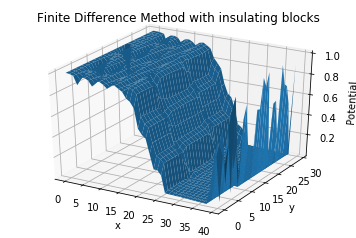

In [274]:
plt.ion()
x = np.arange(ny)
y = np.arange(nx)
X, Y = np.meshgrid(x, y)
fig2 = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,Vmat);
ax.set_title("Finite Difference Method with insulating blocks")
ax.set_zlabel("Potential")
ax.set_xlabel("x")
ax.set_ylabel("y");

If we have a rectangular shape then the calculations seem to be thrown off

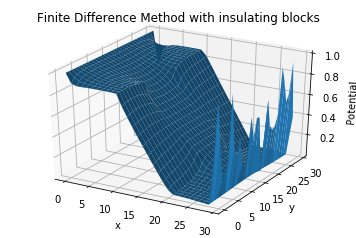

In [297]:
plt.ion()
x = np.arange(ny)
y = np.arange(nx)
X, Y = np.meshgrid(x, y)
fig2 = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,Vmat);
ax.set_title("Finite Difference Method with insulating blocks")
ax.set_zlabel("Potential")
ax.set_xlabel("x")
ax.set_ylabel("y");

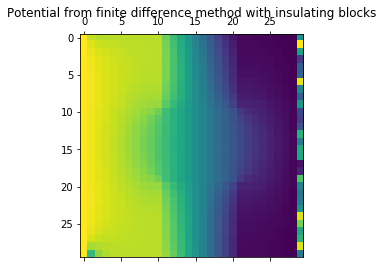

In [298]:
plt.matshow(Vmat);
plt.title("Potential from finite difference method with insulating blocks");

In [299]:
Ey,Ex = np.gradient(Vmat)

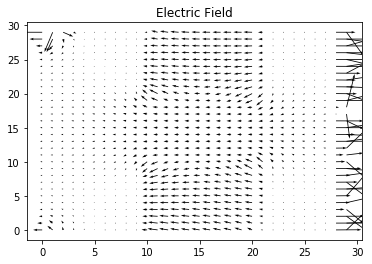

In [300]:
plt.quiver(Ex,Ey);
plt.title("Electric Field");

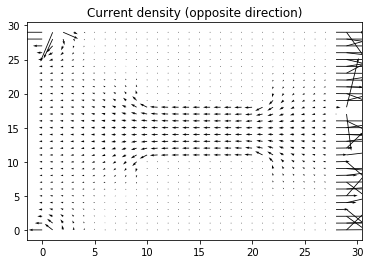

In [301]:
Jx = Cmap*Ex
Jy = Cmap*Ey
plt.quiver(Jx,Jy);
plt.title("Current density (opposite direction)");

In [287]:
total_current = (Jx.mean() + Jy.mean())*0.5

Adjusting parameter of the model

In [337]:
gaps = []
curr = []
for gap in range(0,10):
    # make Cmap
    nx = 30
    ny = 30
    Lb = 10
    bStartX = 0
    bStartY = 10
    gap = gap
    Wb = (nx - gap)/2

    Vmat = np.random.rand(nx,ny)
    Cmap = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            cond_x1 = i >= bStartX and i <= (bStartX + Lb)
            cond_x2 = i >= (bStartX + Wb + gap) and i<= nx

            cond_y1 = j >= bStartY and j <= (bStartY + Wb)
            cond_y2 = j >= (bStartY + Wb + gap) and j <= ny
            if((cond_x1 or cond_x2) and (cond_y1)):
                Cmap[i,j] = 10**-2
            else:
                Cmap[i,j] = 1
    
    V = []
    for i in range(nx*ny):
        V.append(indexer(Vmat,i))
    V = np.array(V)
    
    G,B = create_Gmat2(nx,ny,Cmap)
    
    V = linalg.solve(G,B)
    
    Ey,Ex = np.gradient(Vmat)
    
    Jx = Cmap*Ex
    Jy = Cmap*Ey
    
    curr.append((Jx.mean() + Jy.mean())*0.5)
    gaps.append(gap)
    

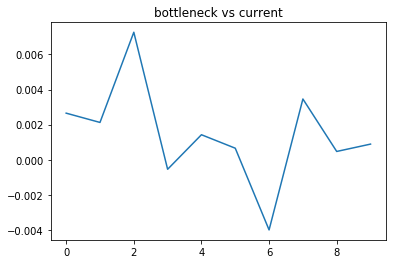

In [341]:
plt.plot(gaps,curr);
plt.title("bottleneck vs current");

The graph is very misleading as the expected shape would be an increase in current as the gap widens. This graph does not reflect that because of the electric field calculation being erradic at the boundaries.

In [345]:
sigmas = []
curr = []
for _sigma in range(10,50):
    # make Cmap
    nx = 30
    ny = 30
    Lb = 10
    bStartX = 0
    bStartY = 10
    gap = 10
    Wb = (nx - gap)/2
    sigma = _sigma**-2
    Vmat = np.random.rand(nx,ny)
    Cmap = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            cond_x1 = i >= bStartX and i <= (bStartX + Lb)
            cond_x2 = i >= (bStartX + Wb + gap) and i<= nx

            cond_y1 = j >= bStartY and j <= (bStartY + Wb)
            cond_y2 = j >= (bStartY + Wb + gap) and j <= ny
            if((cond_x1 or cond_x2) and (cond_y1)):
                Cmap[i,j] = sigma
            else:
                Cmap[i,j] = 1
    
    V = []
    for i in range(nx*ny):
        V.append(indexer(Vmat,i))
    V = np.array(V)
    
    G,B = create_Gmat2(nx,ny,Cmap)
    
    V = linalg.solve(G,B)
    
    Ey,Ex = np.gradient(Vmat)
    
    Jx = Cmap*Ex
    Jy = Cmap*Ey
    
    curr.append((Jx.mean() + Jy.mean())*0.5)
    sigmas.append(sigma)
    

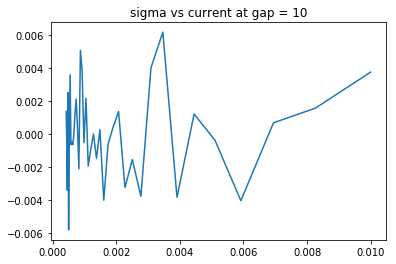

In [346]:
plt.plot(sigmas,curr);
plt.title("sigma vs current at gap = 10");

As the other graph from above, the graph is very noisy and misleading to divergent electric field at the boundaries.

In [347]:
mesh = []
curr = []
for _mesh in range(30,70,10):
    # make Cmap
    nx = _mesh
    ny = _mesh
    Lb = 10
    bStartX = 0
    bStartY = 10
    gap = 10
    Wb = (nx - gap)/2
    Vmat = np.random.rand(nx,ny)
    Cmap = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            cond_x1 = i >= bStartX and i <= (bStartX + Lb)
            cond_x2 = i >= (bStartX + Wb + gap) and i<= nx

            cond_y1 = j >= bStartY and j <= (bStartY + Wb)
            cond_y2 = j >= (bStartY + Wb + gap) and j <= ny
            if((cond_x1 or cond_x2) and (cond_y1)):
                Cmap[i,j] = 10**-2
            else:
                Cmap[i,j] = 1
    
    V = []
    for i in range(nx*ny):
        V.append(indexer(Vmat,i))
    V = np.array(V)
    
    G,B = create_Gmat2(nx,ny,Cmap)
    
    V = linalg.solve(G,B)
    
    Ey,Ex = np.gradient(Vmat)
    
    Jx = Cmap*Ex
    Jy = Cmap*Ey
    
    curr.append((Jx.mean() + Jy.mean())*0.5)
    mesh.append(_mesh)

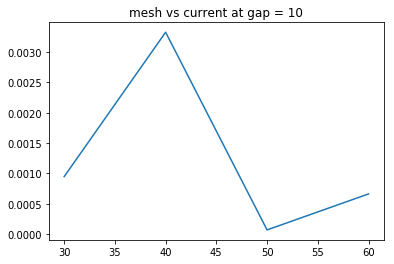

In [349]:
plt.plot(mesh,curr);
plt.title("mesh vs current at gap = 10");

In this graph we should expect asymptotic behavious as mesh size increases. However the boundary electric field throws off the results.